# Introduction & Preprocessing:
Using python 3.9 on anaconda env

Using mushroom data from :
https://archive.ics.uci.edu/ml/datasets/Mushroom

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the
Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or
of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly
states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three,
let it be'' for Poisonous Oak and Ivy.

Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?   <<<<< ## note missing values here ##
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d



In [175]:
# Required imports for both algorithms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold,  cross_validate
import plotly.express as px
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, get_scorer_names, get_scorer, recall_score, precision_score, confusion_matrix
# import matplotlib_inline
# from matplotlib import figure
from sklearn.feature_selection import SelectFromModel


The Mushroom dataset is not labelled so before displaying it. I will:
 - Load the dataset
 - Create the predicted class from the first column
 - Drop attribute "11. stalk-root" as it contains missing values which I would not want to randomise in anyway as it could cause undesirable incorrect classification.
 - Create labels
 -

In [176]:
# load the mushroom data. Change location for mushrooms to where you saved the file.
mushrooms = r'C:\Users\jphai\PycharmProjects\Mushroom_Assessment\agaricus-lepiota.data'

shrooms = pd.read_csv(mushrooms, header=None)

# split the data set between predicted class and attributes.
# the first colum in the dataset is the class, which will e(edible) or (p)poisonous
predicted_class = shrooms[0]
shrooms = shrooms.drop([0], axis=1)

# dropped stalk_root here due to the missing values.
shrooms = shrooms.drop([11], axis=1)

# create the column labels as the index makes interpretation harder.
col_labels = ['cap-shape',
              'cap-surface',
              'cap-color',
              'bruises',
              'odor',
              'gill-attachment',
              'gill-spacing',
              'gill-size',
              'gill-color',
              'stalk-shape',
              # 'stalk-root',     # removed due to missing values
              'stalk-surface-above-ring',
              'stalk-surface-below-ring',
              'stalk-color-above-ring',
              'stalk-color-below-ring',
              'veil-type',
              'veil-color',
              'ring-number',
              'ring-type',
              'spore-print-color',
              'population',
              'habitat'
              ]

Now we can add the labels and have a look at the data. I am taking a copy here incase i want to get back to the indexed version.

In [177]:
labelled_shrooms = shrooms.copy()
labelled_shrooms.columns = col_labels

print(labelled_shrooms.head(5))

  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                    

And lets check the predicted class, which is either edible (e) or poisonous (p)

In [178]:
print(predicted_class.head(5))

0    p
1    e
2    e
3    p
4    e
Name: 0, dtype: object


On checking the data we can see that is all categorical with a lookup required to understand the meaning of the value(see attribute information above). IE cap-colour = n, represents the colour brown.
The data is not ordinal.

So in order to be able to work with the data we will need to one hot encode it. This will create a much wider dataset, with the values of each attribute being suffixed to the column name and a 1 or 0 value is left in that column to indicate if the observation has that characteristic.

All the data is now binary values so there is no need for any further processing such as scaling or normalising.

In [179]:
# One hot encode dem shrooms as all my data points are categorical.
one_hot_shrooms = pd.get_dummies(labelled_shrooms)

# as my data is now all binary values, then there is not further preprocessing required.
# IE there is no continuous data so no need to scale or normalise, etc.
print(one_hot_shrooms.head(5))

   cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            1            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0            1              0              0              1              0   
1            1              0              0              1              0   
2            0              0              0              1              0   
3            1              0              0              0              1   
4            1              0              0              1              0   

   ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0  ...             1             0  

Maybe not actually required but i will also convert the data to numpy arrays to aid performance.

We are now ready to look at our first algorithm.

In [180]:
# convert to numpy array to improve performance
x = one_hot_shrooms.to_numpy()
y = predicted_class.to_numpy()

# Section 2:   Compare two different binary classification algorithms

## K Nearest Neighbours (KNN) Algorithm

First lets try a KNN algorithm. KNN is a lazy algorithm which means it does not need any training points for model generation.
KNN could be a good choice of classification algorithm here on the assumption/basis that poisonous mushrooms will share similar characteristics.
This algorithm will classify a mushroom to be poisonous or edible based on its nearest neighbours. The number of nearest neighbours will vote to decide the classification. Its therefore normally preferable to go with an odd number to prevent draws.
We will try different values of K and different weightings to see how these impact the model but will initially use a value of 5.

In [181]:
# Create a KNeighborsClassifier object and set number of neighbours to 5 initially.
knn_model5 = KNeighborsClassifier(n_neighbors=5, weights='distance') # try distance and uniform

Rather that manually creating a Train/Test split I will use a stratified K fold which means the data is split between train and test 5 times.

In [182]:
skf = StratifiedKFold(n_splits=5) # random state not required as i am not shuffling.
skf.get_n_splits(x, y)
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


We can view how each fold is split between train and test.....

In [183]:
for i, (train_index, test_index) in enumerate(skf.split(x, y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[ 936  937  938 ... 8121 8122 8123]
  Test:  index=[   0    1    2 ... 4126 4128 4130]
Fold 1:
  Train: index=[   0    1    2 ... 8121 8122 8123]
  Test:  index=[ 936  937  938 ... 5008 5009 5011]
Fold 2:
  Train: index=[   0    1    2 ... 8121 8122 8123]
  Test:  index=[1910 1911 1912 ... 6027 6028 6029]
Fold 3:
  Train: index=[   0    1    2 ... 8121 8122 8123]
  Test:  index=[2808 2809 2810 ... 6844 6845 6846]
Fold 4:
  Train: index=[   0    1    2 ... 6844 6845 6846]
  Test:  index=[4276 4283 4291 ... 8121 8122 8123]


Now use the KNN model we have created and the skf train/test split. Cross_val_score will fit the data to the KNN model 5 times with respect to skf
And we can print the score of each fold. Note its using the full dataset.

In [184]:
scores5 = cross_val_score(knn_model5, x, y, cv=skf)

# We can see the scores created for each of the 5 folds
def print_score(scores):
    for i in range(len(scores)):
        print(f'Fold {i} score: {scores[i]}')

print_score(scores5)

Fold 0 score: 0.8615384615384616
Fold 1 score: 1.0
Fold 2 score: 0.9987692307692307
Fold 3 score: 1.0
Fold 4 score: 0.7684729064039408


We can then calculate the mean and the standard deviation of the scores to give us some metrics we can use to check how well the model performed.

In [185]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores5.mean(), scores5.std()))

0.93 accuracy with a standard deviation of 0.10


Its not too bad with 0.93 accuracy and std of 0.10 but can we improve this model?  We can try different neighbour values to see how this impacts the score and also try different weightings of uniform (where all neighbours are weighted equally) or distance (where closer neighbours will have a greater influence than more distant neighbours).

In my testing i found that distance was the better weighting method as it improved accuracy slightly.

In [186]:
print('KNN Using 3 neighbours:')
knn_model3 = KNeighborsClassifier(n_neighbors=3, weights='distance') # using 'distance' improves accuracy slightly
scores3 = cross_val_score(knn_model3, x, y, cv=skf)
print_score(scores3)
print('\n')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores3.mean(), scores3.std()))

KNN Using 3 neighbours:
Fold 0 score: 0.8486153846153847
Fold 1 score: 1.0
Fold 2 score: 0.9987692307692307
Fold 3 score: 1.0
Fold 4 score: 0.8004926108374384


0.93 accuracy with a standard deviation of 0.09


In [187]:
print('KNN Using 2 neighbours:')
knn_model2 = KNeighborsClassifier(n_neighbors=2, weights='distance', p=1)  # p1= euclidean, p2= manhattan (using minkowksi metric)
scores2 = cross_val_score(knn_model2, x, y, cv=skf)
print_score(scores2)
print('\n')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))

KNN Using 2 neighbours:
Fold 0 score: 0.856
Fold 1 score: 1.0
Fold 2 score: 1.0
Fold 3 score: 1.0
Fold 4 score: 0.9193349753694581


0.96 accuracy with a standard deviation of 0.06


So the model appears to improve with less neighbours. I would be inclined to leave it at 2 neighbours with the accuracy
increasing to 96% and the standard deviation reducing to 0.06. I did test going down to 1 but there was no change from 2.
Also tried changing the distance metric from Euclidean (P=1) and Manhattan (P=2) but this did not make any difference.
It may however be preferable to use a value of 3 to prevent any draws in voting but this dataset seems to work better with 2.

So lets check what the final model parameters looked like:

In [188]:
knn_model2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 1,
 'weights': 'distance'}

# Decision Tree Algorithm

Now because our problem is a non linear binary classification problem the 2nd algorithm i will look to implement will be
a decision tree. It also makes sense in my opinion, as the data we have consists of attributes which are categorical
descriptors of a property of the mushroom (nom nom).

As the decision tree can be visualised it may also help to identify certain characteristics of a mushroom that may make
it poisonous or edible

Now the data does not need to be one hot encoded for decision tree classification, however SKLEARN currently does not
handle categorical data in its decision tree algorithm!!
The data is not ordinal though so I can still use the previously one hot encoded data from the previous algorithm.

I will however create a simple manual train/test (70/30) split this time and we can see the dimensions of the two splits below.

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(f'x_train dimensions = {x_train.shape} and x_test dimensions = {x_test.shape}')
print(f'y_train dimensions = {y_train.shape} and y_test dimensions = {y_test.shape}')

x_train dimensions = (5686, 112) and x_test dimensions = (2438, 112)
y_train dimensions = (5686,) and y_test dimensions = (2438,)


When creating a decision tree classifier we can set a max depth of the tree and we can tweak that parameters to help reduce the complexity of the tree.
I will initially go with a depth of 10 and see how this peforms.

In [190]:
tree_model = tree.DecisionTreeClassifier(max_depth=10, random_state=0)

We can then fit the model and make predictions using the test data and measure how it performs. IE how many did the model predict correctly

In [191]:
# fit the model
tree_model.fit(x_train, y_train)

# create predictions using the test split
tree_predict = tree_model.predict(x_test)

# Here we can see the accuracy.
acc = accuracy_score(y_test, tree_predict)
print(acc)

1.0


Now the model is returning an accuracy of 1 which is pretty good. So lets have a look at the parameters of the tree.

In [192]:
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

And check the actual depth used.

In [193]:
tree_model.get_depth()

7

Note the tree has a depth of 7 so i am going to manually check the depth to use:
We could also change the criterion which is the method of splitting the nodes.

In [194]:
def mytree(max_depth, criterion):
    for i in range(1, max_depth):
        tree_model = tree.DecisionTreeClassifier(max_depth=i, criterion=criterion,random_state=0)
        tree_model.fit(x_train, y_train)
        tree_predict = tree_model.predict(x_test)
        acc = accuracy_score(y_test, tree_predict)
        print(f'max_depth of {i}, returns accuracy of: {acc}')

# we can see below how the depth of the tree impacts the accuracy as the depth increases.
mytree(10,criterion='entropy') # entropy performed best from [gini, entropy and log loss]
# mytree(10,criterion='gini')
# mytree(10,criterion='log_loss')

max_depth of 1, returns accuracy of: 0.8798195242001641
max_depth of 2, returns accuracy of: 0.9294503691550451
max_depth of 3, returns accuracy of: 0.9639048400328137
max_depth of 4, returns accuracy of: 0.9856439704675964
max_depth of 5, returns accuracy of: 0.9995898277276456
max_depth of 6, returns accuracy of: 1.0
max_depth of 7, returns accuracy of: 1.0
max_depth of 8, returns accuracy of: 1.0
max_depth of 9, returns accuracy of: 1.0


In the above testing i found that using entropy to split the nodes helped reduce the max depth of the tree to 6 before it obtained an accuracy of 1.
 So using the above configuration i am going to now create a tree model using those parameters

In [195]:
tree_model = tree.DecisionTreeClassifier(max_depth=6,criterion='entropy')
tree_model.fit(x_train, y_train)
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Lets find out a bit more about the tree thats been created. Check how many leaves where created in the tree and we will also create tree labels to help understand the splitting process that is happening at each node.

In [196]:
# obtain the one hot encoded label names to help aid tree visualisation.
tree_labels = one_hot_shrooms.columns.values

# we can see that the number of decision points in the tree is 12.
tree_model.get_n_leaves()

12

Above we can see that the tree uses 12 leaf nodes.

And below we can see the features used in each node of the tree with the starting node being  (odor = N) <= 0.5. (Remembering the data has been one hot encoded!!)  This first split, looking at mushrooms with no odor, has quite a high entropy score and so means there is still a lot of impurity or diverseness in the node at that level, but it quickly works down the tree to reduce the impurity score until it reaches zero and it is able to classify the mushroom as edible or poisonous. The logic is that for the rule in a node, if the data meets the splitting rule then it goes to the right hand side and it the data fails to meet the splitting rules it goes to the left hand side.

[Text(0.5769230769230769, 0.9285714285714286, 'odor_n <= 0.5\nentropy = 0.999\nsamples = 5686\nvalue = [2936, 2750]'),
 Text(0.38461538461538464, 0.7857142857142857, 'bruises_f <= 0.5\nentropy = 0.654\nsamples = 3203\nvalue = [540, 2663]'),
 Text(0.3076923076923077, 0.6428571428571429, 'habitat_u <= 0.5\nentropy = 0.979\nsamples = 924\nvalue = [540, 384]'),
 Text(0.23076923076923078, 0.5, 'spore-print-color_h <= 0.5\nentropy = 0.829\nsamples = 731\nvalue = [540, 191]'),
 Text(0.15384615384615385, 0.35714285714285715, 'odor_p <= 0.5\nentropy = 0.605\nsamples = 634\nvalue = [540, 94]'),
 Text(0.07692307692307693, 0.21428571428571427, 'entropy = 0.0\nsamples = 540\nvalue = [540, 0]'),
 Text(0.23076923076923078, 0.21428571428571427, 'entropy = 0.0\nsamples = 94\nvalue = [0, 94]'),
 Text(0.3076923076923077, 0.35714285714285715, 'entropy = 0.0\nsamples = 97\nvalue = [0, 97]'),
 Text(0.38461538461538464, 0.5, 'entropy = 0.0\nsamples = 193\nvalue = [0, 193]'),
 Text(0.46153846153846156, 0.6428

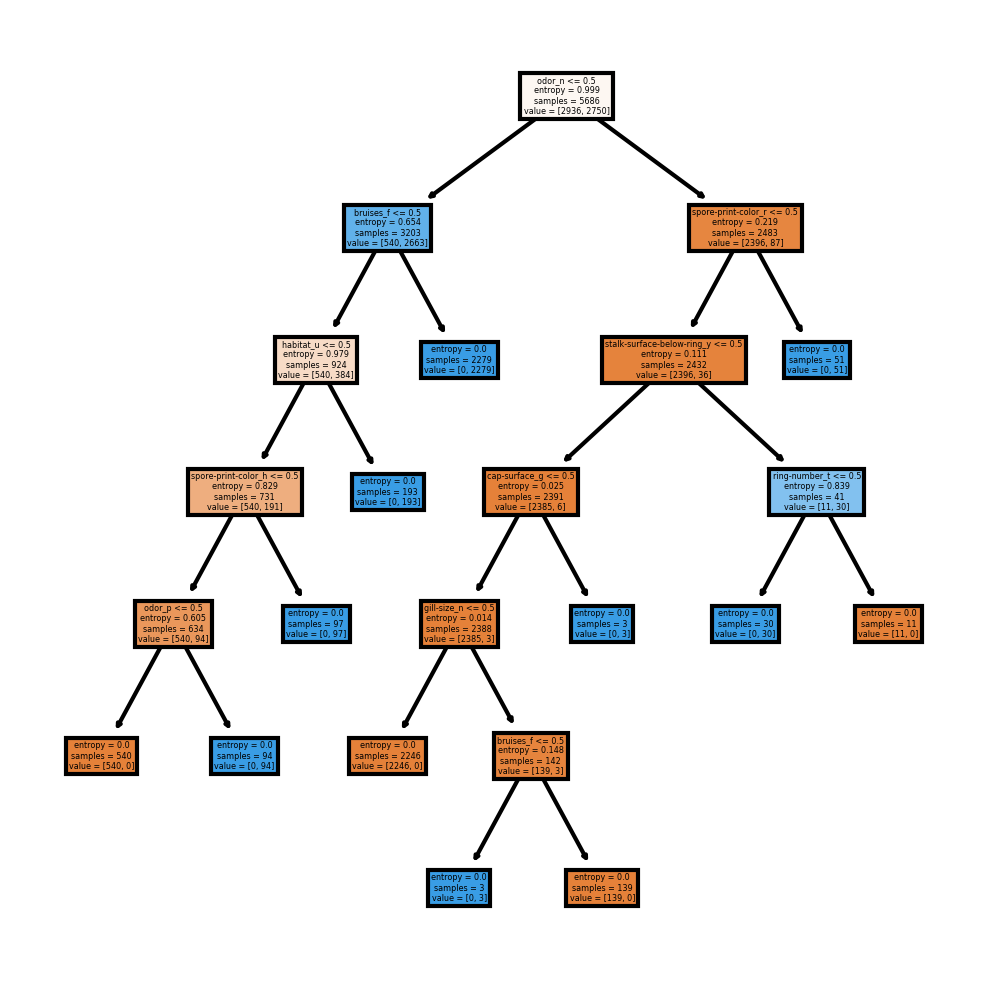

In [197]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(tree_model,feature_names=tree_labels, filled=True)

Looking at feature importance below. We can see that there is quite a lot of attributes that have not been used at all.

In [198]:
tree_model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00479453, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.21338056, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.5353066 , 0.0675645 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00215764, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03088626, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

As the visual representation is quite small and hard to read we can extract a text representation of the tree.

In [199]:
tree_text = tree.export_text(tree_model)
print(tree_text)

|--- feature_27 <= 0.50
|   |--- feature_20 <= 0.50
|   |   |--- feature_110 <= 0.50
|   |   |   |--- feature_91 <= 0.50
|   |   |   |   |--- feature_28 <= 0.50
|   |   |   |   |   |--- class: e
|   |   |   |   |--- feature_28 >  0.50
|   |   |   |   |   |--- class: p
|   |   |   |--- feature_91 >  0.50
|   |   |   |   |--- class: p
|   |   |--- feature_110 >  0.50
|   |   |   |--- class: p
|   |--- feature_20 >  0.50
|   |   |--- class: p
|--- feature_27 >  0.50
|   |--- feature_95 <= 0.50
|   |   |--- feature_58 <= 0.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- feature_36 <= 0.50
|   |   |   |   |   |--- class: e
|   |   |   |   |--- feature_36 >  0.50
|   |   |   |   |   |--- feature_20 <= 0.50
|   |   |   |   |   |   |--- class: p
|   |   |   |   |   |--- feature_20 >  0.50
|   |   |   |   |   |   |--- class: e
|   |   |   |--- feature_7 >  0.50
|   |   |   |   |--- class: p
|   |   |--- feature_58 >  0.50
|   |   |   |--- feature_84 <= 0.50
|   |   |   |   |--- class

Because however the data is one hot encoded its just referencing the feature number rather than the label name so lets see if we can add more context and call out the name of the feature and its importance score.

In [200]:
t = tree_model.feature_importances_
num_feature = []
mytree_features = []
mylabels = []
for i in range(len(t)):
    if t[i]>0:
        num_feature.append(i)
        mytree_features.append(t[i])
        mylabels.append(tree_labels[i])

for i in range(len(mylabels)):
    print(f'Feature {num_feature[i]}: {mylabels[i]} has in importance score of {mytree_features[i]}')

Feature 7: cap-surface_g has in importance score of 0.004794534534378047
Feature 20: bruises_f has in importance score of 0.21338056494682275
Feature 27: odor_n has in importance score of 0.5353065959604323
Feature 28: odor_p has in importance score of 0.06756450277632611
Feature 36: gill-size_n has in importance score of 0.0021576356575033367
Feature 58: stalk-surface-below-ring_y has in importance score of 0.030886264489805016
Feature 84: ring-number_t has in importance score of 0.006054474890064467
Feature 91: spore-print-color_h has in importance score of 0.03905413503800331
Feature 95: spore-print-color_r has in importance score of 0.04814992439743123
Feature 110: habitat_u has in importance score of 0.05265136730923351


Similar to the KNN evaluation we can use similar metrics to evaluate the test data using our tree model. First lets check our model using the test data and

In [201]:
print('Tree model score using test data:')

tree_score_test = cross_val_score(tree_model, x_test,y_test, cv=5, scoring='accuracy')
print_score(tree_score_test)
print('\n')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores3.mean(), scores3.std()))

Tree model score using test data:
Fold 0 score: 1.0
Fold 1 score: 0.9979508196721312
Fold 2 score: 1.0
Fold 3 score: 1.0
Fold 4 score: 0.9938398357289527


0.93 accuracy with a standard deviation of 0.09


So our tree model scores a 0.93 accuracy and a standard deviation of 0.09 when the model is applied to the test data and that test data is cross validated 5 times.. This is broadly similar to the first KNN model using 5 neighbours.

Next i will check some other metrics to look at the data. I cannot figure out how to pass the required 'pos_label = 'e' argument into the cross_validate function ("https://scikit-learn.org/stable/modules/cross_validation.html#:~:text=3.1.1.1.%20The%20cross_validate%20function%20and%20multiple%20metric%20evaluation") when using multiple metrics. So i will instead calculate these separately using the manually split test data:


In [202]:
# For the next metric test of recall_score. i am going to have to predict the class.
print(y_test)
y_pred = tree_model.predict(x_test)
print(y_pred)

['p' 'e' 'e' ... 'p' 'p' 'p']
['p' 'e' 'e' ... 'p' 'p' 'p']


In [203]:
recall_score(y_test, y_pred, average='binary', pos_label='e') # where edible is the positive label- dont know how to pass this into the cross_validate function and i am about to launch my pc out the window !!

1.0

The recall score is great at 1. and the same applies for the precision score also at 1.  This however makes sense when we look at the confusion matrix and see that the tree model has predicted with 100% accuracy against the test data.

In [204]:
precision_score(y_test, y_pred,  pos_label='e')

1.0

In [205]:
confusion_matrix(y_test, y_pred)

array([[1272,    0],
       [   0, 1166]], dtype=int64)

# Section 3 Conclusion

I think both the KNN and the Decision Tree models have performed quite well. Both have a high accuracy levels and are quite close overall.  However i would opt for the decision tree in this instance. The rationale would be that its more easily explainable in that i can see how the rules applied when splitting the nodes, so I have a much better understanding of what features can be used to identify poisonous mushrooms.

The results of the final test of the Decision tree were also compelling given that it predicted with 100% accuracy. So now wiser and more mushroom aware, I am now off down the local meadow to get myself some shrooms safe in the knowledge that the most dangerous thing that will happen will be standing in that cow pat.